Each proposal should include the following sections:

Title


Introduction:

- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question


Preliminary exploratory data analysis:

- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.


Methods:

- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results


Expected outcomes and significance:

- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?

LINK TO PULSAR DATA SITE: https://archive.ics.uci.edu/ml/datasets/HTRU2

In [2]:
# config cell
library(tidyverse)



Definitions of terms used in labeling (found on data set website):

Class: 0 - not a pulsar, 1 - pulsar
      


ip: integrated profile (profile of light emitted by object)
dm-snr: SOMEONE FINISH PLEASE, snr is signal-to-noise ratio, but not sure about dm.
https://arxiv.org/pdf/1005.5068.pdf -> this paper seems to offer some insight

excess kurtosis: proportion of distribution curve in the "tails", a high value here means a looser distribution around a central point

skewness: a measure of symmetry (measures how far "off center" a profile is)

In [18]:
pulsar_data <- read_csv("data/HTRU_2.csv", col_names=c("ip_mean",
                                                       "ip_standard-deviation",
                                                       "ip_excess-kurtosis",
                                                       "ip_skewness",
                                                       "dm_snr_curve_mean",
                                                       "dm_snr_curve_standard_deviation",
                                                       "dn_snr_curve_excess_kurtosis",
                                                       "dn_snr_curve_skewness",
                                                       "Class"))
pulsar_data <- pulsar_data |>
            mutate(Class = as_factor(Class))


Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): ip_mean, ip_standard-deviation, ip_excess-kurtosis, ip_skewness, dm...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


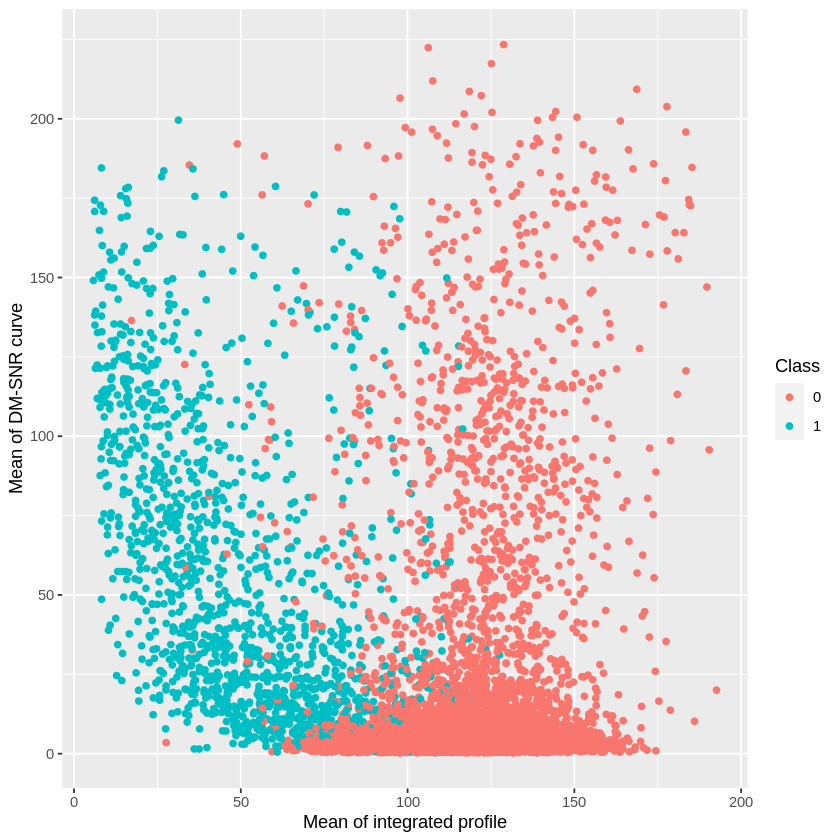

In [19]:
#basic exploratory plot

pulsar_plot <- pulsar_data |>
        ggplot(aes(x=ip_mean, y=dm_snr_curve_mean, color=Class)) +
        geom_point() +
        labs(x="Mean of integrated profile",
             y="Mean of DM-SNR curve",
             color="Class")
               
pulsar_plot